# Introduction #

Insurance fraud occurs when “someone knowingly lies to obtain a benefit or advantage to which they are not otherwise entitled or someone knowingly denies a benefit that is due and to which someone is entitled.” The Coalition Against Insurance Fraud (CAIF) estimates that the annual losses due insurance fraud in America are $308 billion dollars, costs that are often borne not only by insurance companies, but higher premiums for insurance holders. Accordingly, insurance companies, government regulators, and others invest substantial resources annually in mitigating and identifying fraudulent claims.


Accordingly, in this project we will explore a health insurance fraud dataset and review potential factors that may determine when a subsequent claim will in fact be fraudulent. This section will begin the process with initial imports and preprocessing

# Data Preprocessing

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#read in fraud claims csv file
df = pd.read_csv('C://Users//mobee//Documents//Capstone_Project//fraud_data.csv')

In [3]:
df.head()

,Age,Gender,Insurance_Type,Claim_Amount,Diagnosis_Code,Treatment_Code,Hospital_Code,Doctor_Fee,Policy_Type,Fraudulent_Claim
0,62,Female,Health,15216.58254,131,5733,77,646.464587,Basic,0
1,65,Female,Auto,10000.01000,505,5725,22,976.754644,Basic,0
2,71,Female,Home,14838.51176,907,8067,54,216.533344,Premium,0
3,18,Male,Health,10922.98198,256,9255,28,451.173165,Basic,0
4,21,Male,Health,15372.06416,539,2130,29,288.030168,Basic,0


In [4]:
df.describe()

,Age,Claim_Amount,Diagnosis_Code,Treatment_Code,Hospital_Code,Doctor_Fee,Fraudulent_Claim
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,48.474300,15552.516019,549.010500,5514.909000,50.065900,502.942220,0.050000
std,17.894948,4320.615526,260.200451,2581.418015,28.737772,195.883403,0.217956
min,18.000000,10000.010000,100.000000,1000.000000,1.000000,100.000000,0.000000
25%,33.000000,11802.364330,322.000000,3303.750000,25.000000,364.922353,0.000000
50%,49.000000,15134.045560,549.000000,5529.000000,50.000000,500.420514,0.000000
75%,64.000000,18469.750642,776.000000,7760.000000,75.000000,636.865057,0.000000
max,79.000000,35363.897860,999.000000,9998.000000,99.000000,1270.404034,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               10000 non-null  int64  
 1   Gender            10000 non-null  object 
 2   Insurance_Type    10000 non-null  object 
 3   Claim_Amount      10000 non-null  float64
 4   Diagnosis_Code    10000 non-null  int64  
 5   Treatment_Code    10000 non-null  int64  
 6   Hospital_Code     10000 non-null  int64  
 7   Doctor_Fee        10000 non-null  float64
 8   Policy_Type       10000 non-null  object 
 9   Fraudulent_Claim  10000 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [6]:
#null values
df.isna().sum()

Age                 0
Gender              0
Insurance_Type      0
Claim_Amount        0
Diagnosis_Code      0
Treatment_Code      0
Hospital_Code       0
Doctor_Fee          0
Policy_Type         0
Fraudulent_Claim    0
dtype: int64

As we can see, the data is clean. No null values.

C:\Users\mobee\AppData\Local\Temp\ipykernel_7808\250781362.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


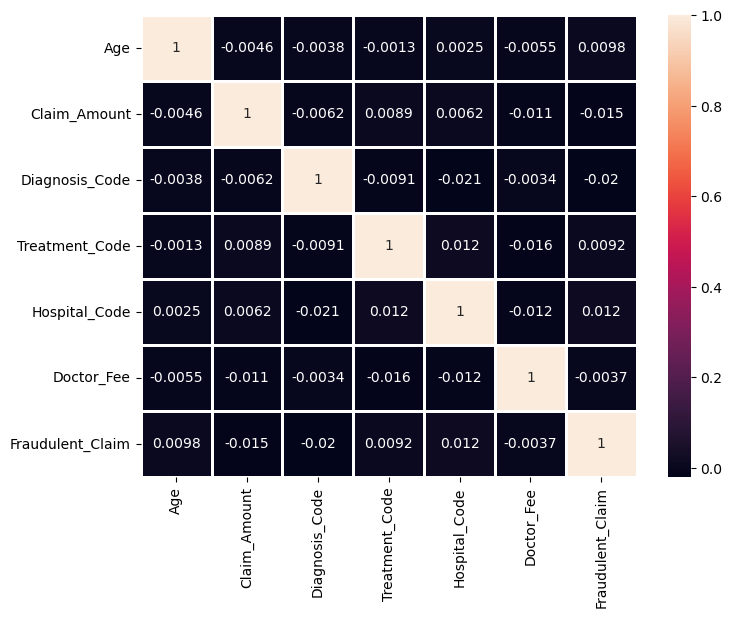

In [7]:
# heatmap

plt.figure(figsize = (8, 6))

corr = df.corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

We are not seeing a high degree of correlation between any of the fields

In [8]:
# Get the breakdown of values in the 'Insurance_Type' column
breakdown = df['Insurance_Type'].value_counts()

print(breakdown)

Auto      3347
Health    3341
Home      3312
Name: Insurance_Type, dtype: int64


In [9]:
# Get the breakdown of values in the 'Policy_Type' column
breakdown = df['Policy_Type'].value_counts()

print(breakdown)

Standard    3361
Basic       3320
Premium     3319
Name: Policy_Type, dtype: int64


In [10]:
# Filter the DataFrame to show only rows where Insurance_Type is Home
home_df = df[df['Insurance_Type'] == 'Home']
print(home_df.head())

    Age  Gender Insurance_Type  Claim_Amount  Diagnosis_Code  Treatment_Code  \
2    71  Female           Home   14838.51176             907            8067   
8    27    Male           Home   14169.73572             730            6182   
10   39    Male           Home   13184.27196             915            6175   
13   41    Male           Home   13464.40947             317            1647   
17   30    Male           Home   21011.09841             951            1639   

    Hospital_Code  Doctor_Fee Policy_Type  Fraudulent_Claim  
2              54  216.533344     Premium                 0  
8              51  236.213472     Premium                 0  
10             89  728.157416    Standard                 0  
13             66  703.722939     Premium                 0  
17             40  762.030358     Premium                 0  


**Analyze data for any oddities**

C:\Users\mobee\AppData\Local\Temp\ipykernel_7808\1280550592.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset[col], kde=True)
C:\Users\mobee\AppData\Local\Temp\ipykernel_7808\1280550592.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset[col], kde=True)
C:\Users\mobee\AppData\L

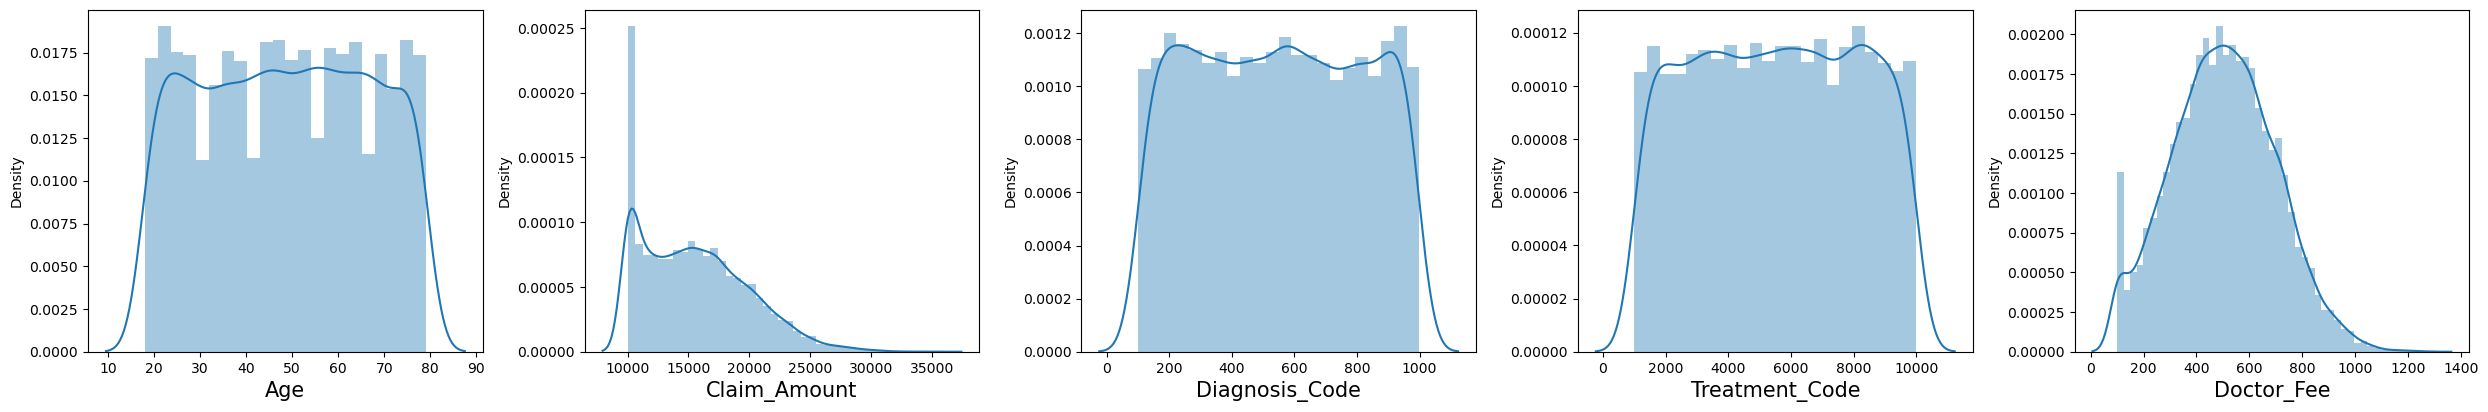

In [11]:
#subset numericals
subset = df[['Age','Claim_Amount','Diagnosis_Code','Treatment_Code','Doctor_Fee']]
#plot
plt.figure(figsize=(25, 20))
plotnumber = 1

for col in subset.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(subset[col], kde=True)
        plt.xlabel(col, fontsize=15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

We are seeing many claims in the amount of $10,000. Need to double check and ensure those are real. Let us see a count of them.

In [12]:
# Count rows with Claim_Amount = 10000
claim_amount_10000_count = df[df['Claim_Amount'] == 10000.01000].shape[0]

print(f"Number of rows with Claim_Amounts equal to 10000: {claim_amount_10000_count}")

Number of rows with Claim_Amounts equal to 10000: 1007


For a dataset with 10000 values to have over a thousand with the *exact same* claim amount is suspicious and unlikely. Chances are this value was added as a placeholder or as an equivalent to "null." We will therefore be replacing these 10000 with the average for the column.

In [13]:
# Filter the DataFrame to show only rows where Claim_Amount is 10000
tenkclaims_df = df[df['Claim_Amount'] == 10000.01000]
print(tenkclaims_df)

      Age  Gender Insurance_Type  Claim_Amount  Diagnosis_Code  \
1      65  Female           Auto      10000.01             505   
12     54  Female         Health      10000.01             255   
32     69    Male           Auto      10000.01             988   
39     36  Female           Home      10000.01             923   
43     69  Female           Home      10000.01             394   
...   ...     ...            ...           ...             ...   
9919   28    Male           Auto      10000.01             677   
9925   71  Female           Home      10000.01             368   
9932   47  Female         Health      10000.01             568   
9942   71  Female         Health      10000.01             426   
9993   66  Female           Home      10000.01             601   

      Treatment_Code  Hospital_Code  Doctor_Fee Policy_Type  Fraudulent_Claim  
1               5725             22  976.754644       Basic                 0  
12              8815             71  555.149476

In [14]:
breakdown_tenk = tenkclaims_df['Insurance_Type'].value_counts()

print(breakdown_tenk)

Auto      340
Health    334
Home      333
Name: Insurance_Type, dtype: int64


I wanted to verify that these values were not all tied to a specific insurance type. I have verified that the 10000 values are distributed across all three. Let us now proceed with replacing the 10000 with the average value for the column

In [15]:
# Calculating the average value of the Claim_Amounts column
average_claim_amount = df['Claim_Amount'].mean()
print(average_claim_amount)

15552.51601922


In [16]:
# Replace instances of 10000 with the average value
df.loc[df['Claim_Amount'] == 10000.01000, 'Claim_Amount'] = average_claim_amount

In [17]:
df.head()

,Age,Gender,Insurance_Type,Claim_Amount,Diagnosis_Code,Treatment_Code,Hospital_Code,Doctor_Fee,Policy_Type,Fraudulent_Claim
0,62,Female,Health,15216.582540,131,5733,77,646.464587,Basic,0
1,65,Female,Auto,15552.516019,505,5725,22,976.754644,Basic,0
2,71,Female,Home,14838.511760,907,8067,54,216.533344,Premium,0
3,18,Male,Health,10922.981980,256,9255,28,451.173165,Basic,0
4,21,Male,Health,15372.064160,539,2130,29,288.030168,Basic,0


In [18]:
subset = df[['Age','Claim_Amount','Diagnosis_Code','Treatment_Code','Doctor_Fee']]

C:\Users\mobee\AppData\Local\Temp\ipykernel_7808\2734172212.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset[col], kde=True)
C:\Users\mobee\AppData\Local\Temp\ipykernel_7808\2734172212.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset[col], kde=True)
C:\Users\mobee\AppData\Loc

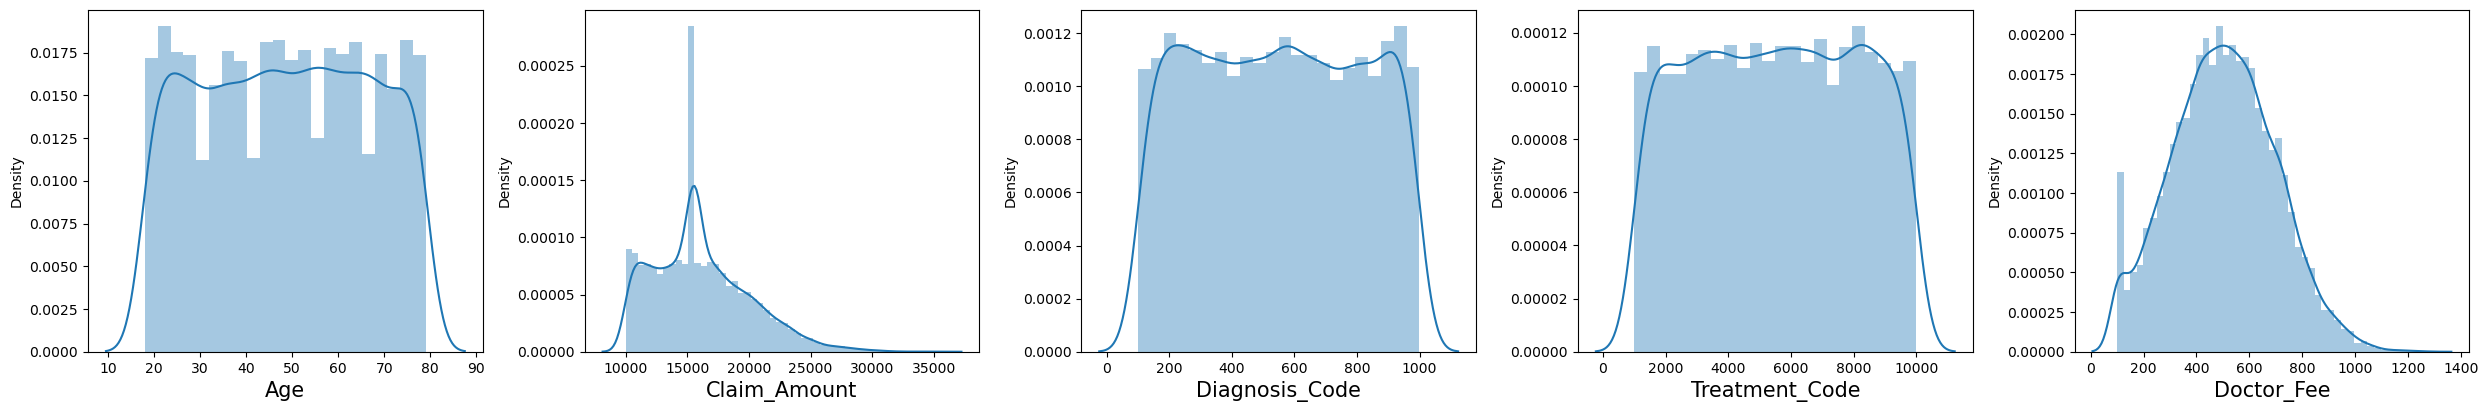

In [19]:
#let's plot the columns again
plt.figure(figsize=(25, 20))
plotnumber = 1

for col in subset.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(subset[col], kde=True)
        plt.xlabel(col, fontsize=15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

In [20]:
claim_amount_mean_count = df[df['Claim_Amount'] == 15552.51601922].shape[0]

print(f"Number of rows with Claim_Amounts equal to mean valeu: {claim_amount_mean_count}")

Number of rows with Claim_Amounts equal to mean valeu: 1007


**Encode Categorical Columns**

In [21]:
# Fraudulent_Claim being the column for our y to assess
# separating feature and target columns

X = df.drop('Fraudulent_Claim', axis = 1)
y = df['Fraudulent_Claim']

In [22]:
#subset categorical columns
categorical_df = X.select_dtypes(include = ['object'])

In [23]:
categorical_df.head()

,Gender,Insurance_Type,Policy_Type
0,Female,Health,Basic
1,Female,Auto,Basic
2,Female,Home,Premium
3,Male,Health,Basic
4,Male,Health,Basic


In [24]:
# unique values of each column
for col in categorical_df.columns:
    print(f"{col}: \n{categorical_df[col].unique()}\n")

Gender: 
['Female' 'Male']

Insurance_Type: 
['Health' 'Auto' 'Home']

Policy_Type: 
['Basic' 'Premium' 'Standard']



In [25]:
#one hot encoding
categorical_df = pd.get_dummies(categorical_df, drop_first = True)

In [26]:
categorical_df.head()

,Gender_Male,Insurance_Type_Health,Insurance_Type_Home,Policy_Type_Premium,Policy_Type_Standard
0,0,1,0,0,0
1,0,0,0,0,0
2,0,0,1,1,0
3,1,1,0,0,0
4,1,1,0,0,0


In [27]:
#subset number columns
number_df = X.select_dtypes(include=['int64', 'float64'])

In [28]:
number_df.head()

,Age,Claim_Amount,Diagnosis_Code,Treatment_Code,Hospital_Code,Doctor_Fee
0,62,15216.582540,131,5733,77,646.464587
1,65,15552.516019,505,5725,22,976.754644
2,71,14838.511760,907,8067,54,216.533344
3,18,10922.981980,256,9255,28,451.173165
4,21,15372.064160,539,2130,29,288.030168


In [29]:
# combining number and categorical dataframes

X = pd.concat([number_df, categorical_df], axis = 1)

In [30]:
X.head()

,Age,Claim_Amount,Diagnosis_Code,Treatment_Code,Hospital_Code,Doctor_Fee,Gender_Male,Insurance_Type_Health,Insurance_Type_Home,Policy_Type_Premium,Policy_Type_Standard
0,62,15216.582540,131,5733,77,646.464587,0,1,0,0,0
1,65,15552.516019,505,5725,22,976.754644,0,0,0,0,0
2,71,14838.511760,907,8067,54,216.533344,0,0,1,1,0
3,18,10922.981980,256,9255,28,451.173165,1,1,0,0,0
4,21,15372.064160,539,2130,29,288.030168,1,1,0,0,0


**Analyze**

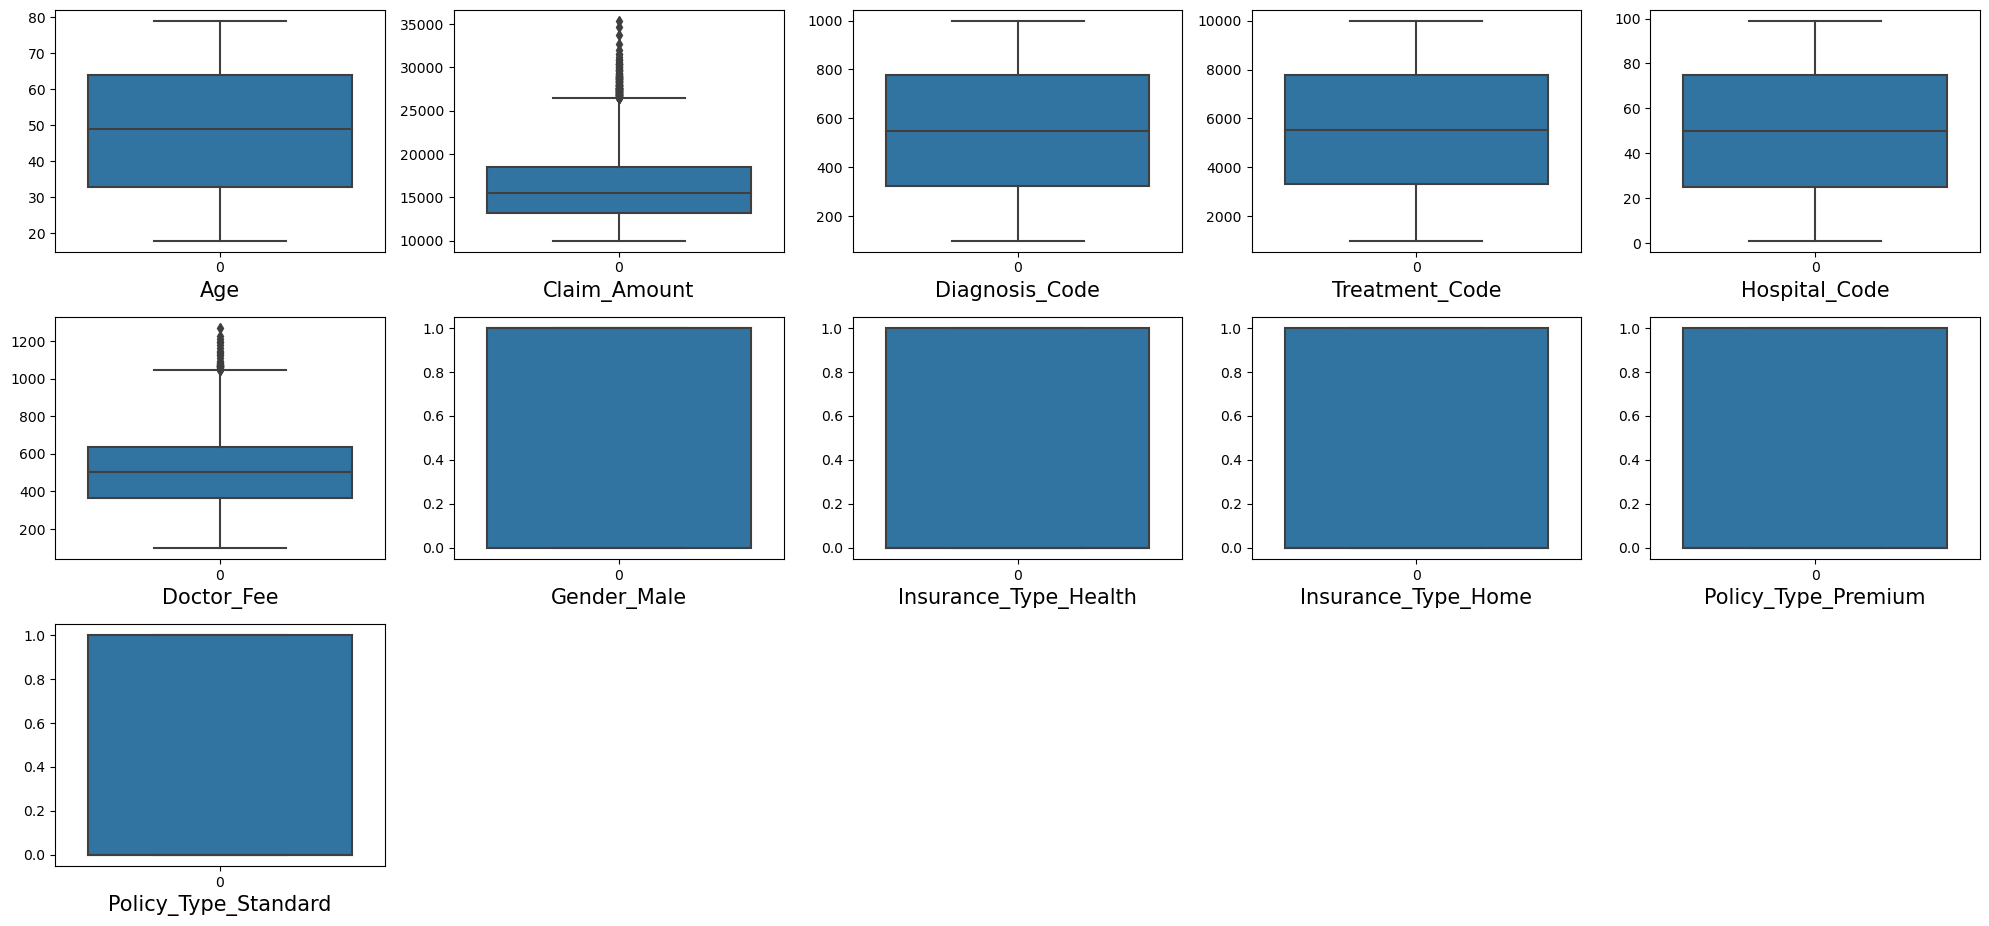

In [31]:
#checking for outliers
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

Outliers are apparent in Claim_Amount and Doctor_fee

**I am going to begin now defining my features and the target, and setup my training and test data**

In [32]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [33]:
X_train.head()

,Age,Claim_Amount,Diagnosis_Code,Treatment_Code,Hospital_Code,Doctor_Fee,Gender_Male,Insurance_Type_Health,Insurance_Type_Home,Policy_Type_Premium,Policy_Type_Standard
6739,52,29731.15799,806,5401,77,487.198924,1,0,1,0,0
8342,73,14882.05032,616,6739,82,837.659743,1,0,0,0,0
8018,21,21003.23263,475,7138,58,456.910720,1,1,0,0,1
5635,47,16115.11858,424,5370,61,731.591697,0,0,0,0,1
8490,76,15650.94442,381,7911,22,148.140326,0,1,0,0,0


In [34]:
#finally, will scale training data for subsequent analysis and modeling
num_df= X_train[['Age', 'Claim_Amount', 'Doctor_Fee']]

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)

In [36]:
scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = X_train.index)
scaled_num_df.head()

,Age,Claim_Amount,Doctor_Fee
6739,0.195268,3.480531,-0.078929
8342,1.368800,-0.317554,1.705340
8018,-1.537089,1.248114,-0.233133
5635,-0.084144,-0.002162,1.165326
8490,1.536448,-0.120888,-1.805148


In [37]:
X_train.drop(columns = scaled_num_df.columns, inplace = True)

In [38]:
X_train = pd.concat([scaled_num_df, X_train], axis = 1)

In [39]:
X_train.head()

,Age,Claim_Amount,Doctor_Fee,Diagnosis_Code,Treatment_Code,Hospital_Code,Gender_Male,Insurance_Type_Health,Insurance_Type_Home,Policy_Type_Premium,Policy_Type_Standard
6739,0.195268,3.480531,-0.078929,806,5401,77,1,0,1,0,0
8342,1.368800,-0.317554,1.705340,616,6739,82,1,0,0,0,0
8018,-1.537089,1.248114,-0.233133,475,7138,58,1,1,0,0,1
5635,-0.084144,-0.002162,1.165326,424,5370,61,0,0,0,0,1
8490,1.536448,-0.120888,-1.805148,381,7911,22,0,1,0,0,0


*We have complete preprocessing and are now ready to begin modeling*

# Modeling

**1. Support Vector Classifier**

In [41]:
from sklearn.svm import SVC

# Assuming X_train and X_test are pandas DataFrames or similar
# Make sure column names and order are consistent
print("Training data columns:", X_train.columns)
print("Test data columns:", X_test.columns)

# Ensure columns in X_test are in the same order as X_train
X_test = X_test[X_train.columns]

# Initialize and fit SVC model
svc = SVC()
svc.fit(X_train, y_train)

# Predict using the fitted model
y_pred = svc.predict(X_test)

Training data columns: Index(['Age', 'Claim_Amount', 'Doctor_Fee', 'Diagnosis_Code', 'Treatment_Code',
       'Hospital_Code', 'Gender_Male', 'Insurance_Type_Health',
       'Insurance_Type_Home', 'Policy_Type_Premium', 'Policy_Type_Standard'],
      dtype='object')
Test data columns: Index(['Age', 'Claim_Amount', 'Diagnosis_Code', 'Treatment_Code',
       'Hospital_Code', 'Doctor_Fee', 'Gender_Male', 'Insurance_Type_Health',
       'Insurance_Type_Home', 'Policy_Type_Premium', 'Policy_Type_Standard'],
      dtype='object')


In [42]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of SVC: {svc_train_acc}")
print(f"Test accuracy of SVC: {svc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of SVC: 0.9510666666666666
Test accuracy of SVC: 0.9468
[[2367    0]
 [ 133    0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2367
           1       0.00      0.00      0.00       133

    accuracy                           0.95      2500
   macro avg       0.47      0.50      0.49      2500
weighted avg       0.90      0.95      0.92      2500



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**2. Decision Tree Classifier**

In [43]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train = accuracy_score(y_train, dtc.predict(X_train))
dtc_test = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree: {dtc_train}")
print(f"Test accuracy of Decision Tree: {dtc_test}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree: 1.0
Test accuracy of Decision Tree: 0.6944
[[1692  675]
 [  89   44]]
              precision    recall  f1-score   support

           0       0.95      0.71      0.82      2367
           1       0.06      0.33      0.10       133

    accuracy                           0.69      2500
   macro avg       0.51      0.52      0.46      2500
weighted avg       0.90      0.69      0.78      2500



In [45]:
#tune hyperparameter

from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [46]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 9, 'min_samples_split': 2}
0.9510666666666667


In [47]:
# check best estimator

dtc = grid_search.best_estimator_

y_pred = dtc.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train = accuracy_score(y_train, dtc.predict(X_train))
dtc_test = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree: {dtc_train}")
print(f"Test accuracy of Decision Tree: {dtc_test}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree: 0.9510666666666666
Test accuracy of Decision Tree: 0.9468
[[2367    0]
 [ 133    0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2367
           1       0.00      0.00      0.00       133

    accuracy                           0.95      2500
   macro avg       0.47      0.50      0.49      2500
weighted avg       0.90      0.95      0.92      2500



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**3. KNN**

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn_train = accuracy_score(y_train, knn.predict(X_train))
knn_test = accuracy_score(y_test, y_pred)

print(f"Training accuracy of KNN: {knn_train}")
print(f"Test accuracy of KNN: {knn_test}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of KNN: 0.9510666666666666
Test accuracy of KNN: 0.9468
[[2367    0]
 [ 133    0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2367
           1       0.00      0.00      0.00       133

    accuracy                           0.95      2500
   macro avg       0.47      0.50      0.49      2500
weighted avg       0.90      0.95      0.92      2500



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**4. Random Forest**

In [51]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rand_clf.fit(X_train, y_train)

y_pred = rand_clf.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rand_clf_train = accuracy_score(y_train, rand_clf.predict(X_train))
rand_clf_test = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest: {rand_clf_train}")
print(f"Test accuracy of Random Forest: {rand_clf_test}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Random Forest: 0.9510666666666666
Test accuracy of Random Forest: 0.9468
[[2367    0]
 [ 133    0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2367
           1       0.00      0.00      0.00       133

    accuracy                           0.95      2500
   macro avg       0.47      0.50      0.49      2500
weighted avg       0.90      0.95      0.92      2500



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**5. Gradient Boosting**

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier: {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier: {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

Training Accuracy of Gradient Boosting Classifier: 0.9532
Test Accuracy of Gradient Boosting Classifier: 0.942 

Confusion Matrix :- 
[[2355   12]
 [ 133    0]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      2367
           1       0.00      0.00      0.00       133

    accuracy                           0.94      2500
   macro avg       0.47      0.50      0.49      2500
weighted avg       0.90      0.94      0.92      2500



**6. XGBoost**

In [55]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/a2/48/d5da8591891327b0faf08179d420fba3893c6134bdd449497c5329e4cb01/xgboost-2.1.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/124.9 MB 23.7 MB/s eta 0:00:06
    --------------------------------------- 2.3/124.9 MB 29.1 MB/s eta 0:00:05
   - -------------------------------------- 4.4/124.9 MB 30.8 MB/s eta 0:00:04
   - -------------------------------------- 5.9/124.9 MB 34.0 MB/s eta 0:00:04
   -- ------------------------------------- 7.2/124.9 MB 32.8 MB/s eta 0:00:04
   -- ------------------------------------- 8.8/124.9 MB 35.2 MB/s eta 0:00:04
   --- ------------------------------------ 10.6/124.9 MB 36.4 MB/s eta 0:00:04
   ---- ----------------------------------- 12.6/124.9 MB 40.9 MB/s eta 0:00:03
   ---- ----

In [56]:
from xgboost import XGBClassifier

In [57]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

In [58]:
xgb_train = accuracy_score(y_train, xgb.predict(X_train))
xgb_test = accuracy_score(y_test, y_pred)

print(f"Training accuracy of XGBoost: {xgb_train}")
print(f"Test accuracy of XGBoost: {xgb_test}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of XGBoost: 0.9908
Test accuracy of XGBoost: 0.9468
[[2367    0]
 [ 133    0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2367
           1       0.00      0.00      0.00       133

    accuracy                           0.95      2500
   macro avg       0.47      0.50      0.49      2500
weighted avg       0.90      0.95      0.92      2500



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
param_grid = {"n_estimators": [10, 50, 100, 130], "criterion": ['gini', 'entropy'],
                               "max_depth": range(2, 10, 1)}

grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5,  verbose=3,n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [60]:
# Check best estimator

xgb = grid_search.best_estimator_

y_pred = xgb.predict(X_test)

In [61]:
xgb_train = accuracy_score(y_train, xgb.predict(X_train))
xgb_test = accuracy_score(y_test, y_pred)

print(f"Training accuracy of XGBoost: {xgb_train}")
print(f"Test accuracy of XGBoost: {xgb_test}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of XGBoost: 0.9510666666666666
Test accuracy of XGBoost: 0.9468
[[2367    0]
 [ 133    0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2367
           1       0.00      0.00      0.00       133

    accuracy                           0.95      2500
   macro avg       0.47      0.50      0.49      2500
weighted avg       0.90      0.95      0.92      2500



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
